In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [47]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [49]:
X = digits['data']
y = digits['target']
X.shape, y.shape

((1797, 64), (1797,))

<Figure size 640x480 with 0 Axes>

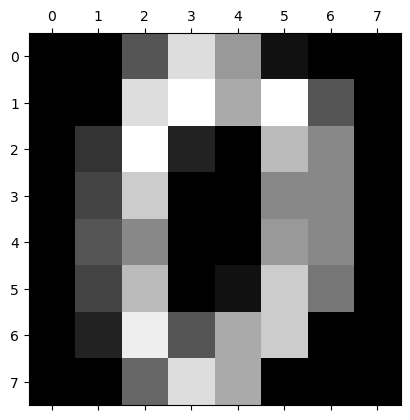

In [50]:
plt.gray()
plt.matshow(digits['images'][0])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [52]:
def one_hot(y, num_classes):
    m = len(y)
    y_hot = np.zeros((m, num_classes))
    for i in range(m):
        y_hot[i, y[i]] = 1
    return y_hot

In [54]:
def softmax(z):
    p_hat = np.exp(z)
    for i in range(len(z)):
        p_hat[i] /= np.sum(p_hat[i]) 
    return p_hat

In [55]:
def cross_entropy_loss(p_hat, y):
    # y is not one-hot in this loss function
    return -np.mean(np.log(p_hat[np.arange(len(y)), y])) 

In [56]:
def fit(X, y, lr, num_classes, epochs, alpha):
    m, n = X.shape
    w = np.random.random((n, num_classes))
    b = np.random.random(num_classes)
    cost_history = []
    best_cost = 999
    
    try:
        for epoch in range(epochs):
            z = X.dot(w) + b
            y_hot = one_hot(y, num_classes)
            p_hat = softmax(z)
            w_grad = (1/m) * np.dot(X.T, (p_hat - y_hot))
            b_grad = (1/m) * np.sum(p_hat - y_hot)
            w = w - lr * w_grad
            b = b - lr * b_grad
            cost = cross_entropy_loss(p_hat, y)
            cost = cost + alpha * (1/2 * np.sum(np.square(w))) # l2 regularization
            if cost < best_cost:
                best_cost = cost
            else:
                raise UnboundLocalError
            cost_history.append(cost)
            if epoch % 200 == 0:
                print(f'at epoch {epoch} the cost is {cost}')
    except UnboundLocalError:
        print('early stop')
        print(epoch, cost)
        
    return w, b, cost_history

In [57]:
num_classes = 10
learning_rate = 0.01
num_epochs = 1000000
alpha = 0.3
weights, biases, cost_history = fit(X_train, y_train, learning_rate, 
                                    num_classes, num_epochs, alpha)

at epoch 0 the cost is 69.51061247635371
at epoch 200 the cost is 32.15199326611801
at epoch 400 the cost is 31.866060976152085
at epoch 600 the cost is 31.764127873006085
at epoch 800 the cost is 31.714361794963203
at epoch 1000 the cost is 31.688597795790113
at epoch 1200 the cost is 31.677394861107516
early stop
1349 31.675357632809238


In [58]:
def predict(X, w, b):
    z = X.dot(w) + b
    p_hat = softmax(z)
    predicted_class = np.argmax(p_hat, axis=1)
    return predicted_class

In [59]:
def accuracy(y_pred, y):
    m = len(y)
    return np.sum(y_pred == y) / m

In [60]:
train_predictions = predict(X_train, weights, biases)
train_accuracy = accuracy(train_predictions, y_train)
test_predictions = predict(X_test, weights, biases)
test_accuracy = accuracy(test_predictions, y_test)
print(train_accuracy, test_accuracy)

0.9826839826839827 0.9277777777777778


actual class 0 predicted class 0
actual class 1 predicted class 1
actual class 2 predicted class 2
actual class 3 predicted class 3
actual class 4 predicted class 4
actual class 5 predicted class 9


<Figure size 640x480 with 0 Axes>

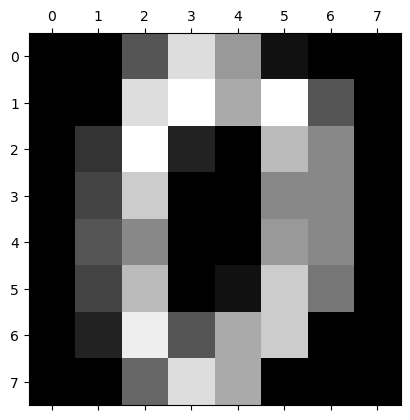

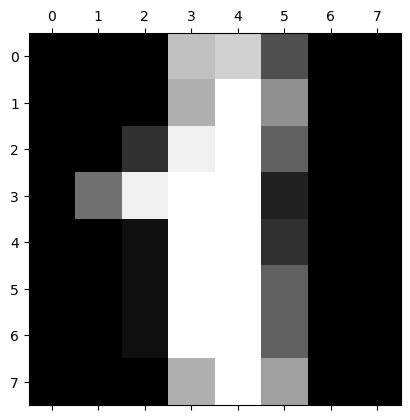

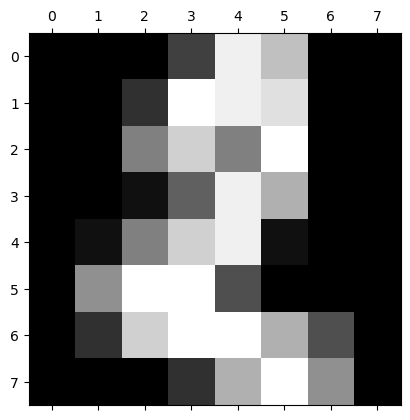

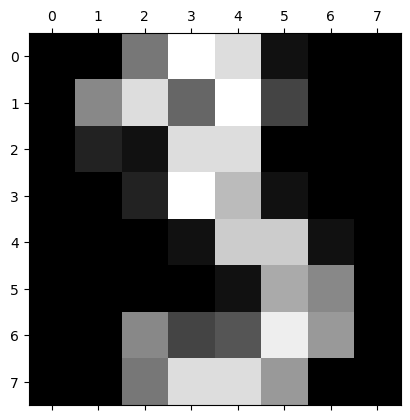

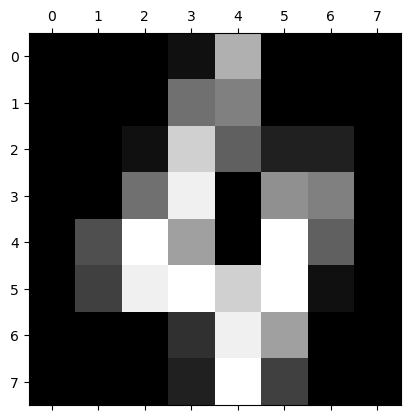

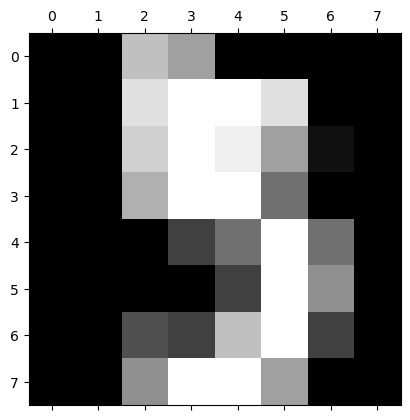

In [61]:
for i in range(6):
    plt.gray()
    plt.matshow(digits['images'][i])
    predictions = predict(X, weights, biases)
    print(f'actual class {y[i]} predicted class {predictions[i]}')